In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics  import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing  import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Get the dataset as df and print the head
df=pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
#Print summary 
print('shape ---->',df.shape)
print('Each column and datatype and its count','\n')
print(df.info())

shape ----> (209593, 37)
Each column and datatype and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null 

In [4]:
#We can remove 'Unnamed: 0 ' and 'pdate 'from the dataset
df=df.drop(['Unnamed: 0','pdate','msisdn'],axis=1)

In [5]:
#DataFrame statistics
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

.As we have one column 'pcircle' having object datatype . so, first we can encode that column then we move further.             

In [6]:
#Importing OrdinalEncoder
from sklearn.preprocessing  import OrdinalEncoder

In [7]:
ord_encoder=OrdinalEncoder(categories=[['UPW']])
df1=ord_encoder.fit_transform(df[['pcircle']])
df1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [8]:
#OvrRide pcircle  to the dataset.
df['pcircle']=df1
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

   pcircle  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 34 columns]

In [9]:
print('label(Y)=>',df.label.value_counts()[1])
print('label(N)=>',df.label.value_counts()[0])

label(Y)=> 183431
label(N)=> 26162


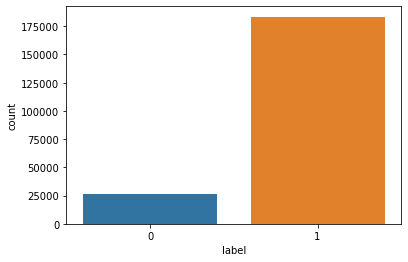

In [10]:
#plot each class frequency
sns.countplot(x='label',data=df)
plt.show()

We can use ensemble technique to solve this imbalency problem. We can check this later that we can improve after removing this.       

In [11]:
#Duplicates removal
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(209207, 34)

# Removing Imbalency  by using OverSampling

In [13]:
#Divide by class
df_class_1=df[df['label']==0]
df_class_0=df[df['label']==1]

In [14]:
df_class_1.shape

(25792, 34)

In [15]:
df_class_0.shape

(183415, 34)

In [16]:
#class count
count_class_0,count_class_1=df.label.value_counts()

In [17]:
count_class_0,count_class_1

(183415, 25792)

In [18]:
df_class_0_over=df.sample(count_class_1,replace=True)

df=pd.concat([df_class_1,df_class_0_over],axis=0)
print('Random over_sampling:')
print(df.label.value_counts())

Random over_sampling:
0    28939
1    22645
Name: label, dtype: int64


In [19]:
#Re-plot each class frequency to check imbalency
sns.countplot(x='label',data=df)
plt.show()

.Now the model is ready to use further as imbalebency is removed.             

In [20]:
#Using SelectKBest feature to select best feature.    
#Importing SelectKBest,f_classif
from sklearn.feature_selection import SelectKBest,f_classif

In [21]:
#splitting the dataset into feature and label
x=df.drop('label',axis=1)
y=df.label

In [25]:
best_features=SelectKBest(score_func=f_classif,k=25)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

#concatnate dataframes
features_scores=pd.concat([df_columns,df_scores],axis=1)
features_scores.columns=['Feature_Name','score']

print(features_scores.nlargest(25,'score'))

            Feature_Name         score
13         cnt_ma_rech90  11834.451554
8          cnt_ma_rech30  11165.095700
15     sumamnt_ma_rech90   9172.858020
27          amnt_loans90   8618.742954
10     sumamnt_ma_rech30   8494.294543
23          amnt_loans30   8042.219796
22           cnt_loans30   7837.021827
2           daily_decr90   6025.331269
1           daily_decr30   5993.299415
11  medianamnt_ma_rech30   2555.301458
7       last_rech_amt_ma   2298.756266
16  medianamnt_ma_rech90   1683.466577
28       maxamnt_loans90   1244.666208
14          fr_ma_rech90    850.848914
4               rental90    784.669080
3               rental30    400.133405
25    medianamnt_loans30    287.772600
31             payback90    225.873347
30             payback30    203.408449
29    medianamnt_loans90    158.525613
17  medianmarechprebal90    118.867686
21          fr_da_rech90     14.717550
18         cnt_da_rech30      4.570704
12  medianmarechprebal30      3.545849
0                    aon 

In [29]:
#Model Building
new_x=df[['cnt_ma_rech90','cnt_ma_rech30','sumamnt_ma_rech90','amnt_loans90','sumamnt_ma_rech30','amnt_loans30','cnt_loans30','daily_decr90','daily_decr30','medianamnt_ma_rech30','last_rech_amt_ma','medianamnt_ma_rech90','maxamnt_loans90','fr_ma_rech90','rental90','rental30','medianamnt_loans30','payback90','payback30','medianamnt_loans90','medianmarechprebal90','fr_da_rech90','cnt_da_rech30','medianmarechprebal30','aon']]

In [30]:
new_x

cnt_ma_rech90  cnt_ma_rech30  sumamnt_ma_rech90  amnt_loans90  \
0                   2              2               3078            12   
11                  2              2               9065             6   
15                  0              0                  0             6   
16                  0              0                  0             6   
21                  2              1               1546            12   
...               ...            ...                ...           ...   
31001               1              1               1539             6   
105259              7              5               8046            30   
14326              32             16              38695           162   
12567               1              1                770             6   
136819              2              2               1546             6   

        sumamnt_ma_rech30  amnt_loans30  cnt_loans30  daily_decr90  \
0                  3078.0            12            2   3065.150000   
11                 9065.0             6            1     65.166667   
15                    0.0             6            1     12.000000   
16                    0.0             6            1   1000.000000   
21                  773.0            12            2    515.200000   
...                   ...           ...          ...           ...   
31001              1539.0             6            1    954.100000   
105259             6926.0            30            5     57.116667   
14326             18573.0            96           11  34740.370000   
12567               770.0             6            1      6.975000   
136819             1546.0             6            1      2.200000   

        daily_decr30  medianamnt_ma_rech30  ...  rental30  medianamnt_loans30  \
0        3055.050000                1539.0  ...    220.13                 0.0   
11         65.166667                4532.5  ...    326.20                 0.0   
15         12.000000                   0.0  ...   1216.80                 0.0   
16       1000.000000                   0.0  ...   1000.80                 0.0   
21        514.693333                 773.0  ...     56.26                 0.0   
...              ...                   ...  ...       ...                 ...   
31001     952.690000                1539.0  ...    664.74                 0.0   
105259     57.116667                1539.0  ...   1289.38                 0.0   
14326   34494.000000                 770.0  ...   6039.43                 0.0   
12567       6.975000                 770.0  ...   4155.00                 0.0   
136819      2.200000                 773.0  ...      0.00                 1.0   

        payback90  payback30  medianamnt_loans90  medianmarechprebal90  \
0       29.000000  29.000000                 0.0                  7.50   
11       0.000000   0.000000                 0.0                489.00   
15       0.000000   0.000000                 0.0                  0.00   
16       0.000000   0.000000                 0.0                  0.00   
21       0.000000   0.000000                 0.0                283.50   
...           ...        ...                 ...                   ...   
31001    0.000000   0.000000                 0.0                  4.07   
105259   5.200000   5.200000                 0.0                 49.20   
14326    2.590909   2.333333                 0.0                 23.50   
12567    0.000000   0.000000                 0.0                 94.33   
136819   0.000000   0.000000                 1.0                423.70   

        fr_da_rech90  cnt_da_rech30  medianmarechprebal30            aon  
0                  0            0.0                  7.50     272.000000  
11                 0            0.0                489.00      82.000000  
15                 0            0.0                  0.00    1037.000000  
16                 0            0.0                  0.00    1583.000000  
21                 0            0.0                54

In [31]:
#Data scaling 
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [33]:
#Building model 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=100)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [34]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[5901, 1341],
       [1643, 4011]], dtype=int64)

In [35]:
#Classification_report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      7242
           1       0.75      0.71      0.73      5654

    accuracy                           0.77     12896
   macro avg       0.77      0.76      0.76     12896
weighted avg       0.77      0.77      0.77     12896



.Now our model fits 77 % of data. We can improve by removing outliers if present nd trying Hyperparameter tunning to improve the score.  

In [36]:
#To check weather the model is overfitted or not by using cross_val_score
#Importing cross_val_score
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(knn,x_scaler,y,cv=5)

array([0.76427256, 0.76029854, 0.76310943, 0.75642144, 0.78770841])

In [38]:
cross_val_score(KNeighborsClassifier(),x_scaler,y,cv=5).mean()

0.7663620763480491

.As the accuracy is approx same as the earlier. so, we can say that model is not overfitted.

# HyperParameterTunning using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid={'algorithm':['kd-tree','brute'],
            'leaf_size':[15,17,19,21],
            'n_neighbors':[3,5,7,13]
}

In [41]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [42]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd-tree', 'brute'],
                         'leaf_size': [15, 17, 19, 21],
                         'n_neighbors': [3, 5, 7, 13]})

In [43]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 13}

In [44]:
#we will use best parameter in our knn to check if accuracy is increasing.
knn=KNeighborsClassifier(algorithm='brute',leaf_size=15,n_neighbors=13)

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=13)

In [46]:
y_pred=knn.predict(x_test)

In [47]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[5976, 1266],
       [1655, 3999]], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      7242
           1       0.76      0.71      0.73      5654

    accuracy                           0.77     12896
   macro avg       0.77      0.77      0.77     12896
weighted avg       0.77      0.77      0.77     12896



.Now we didnt improve our accuracy .so, now trying to find outliers and remove them, using Zscore


# Checking Outliers using ZScore  and removing them 

In [49]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df))
print(z)

[[0.88459484 0.1063721  0.03623255 ... 2.85558599 2.35308218        nan]
 [0.88459484 0.10880659 0.45811872 ... 0.30660606 0.33840169        nan]
 [0.88459484 0.0965701  0.46562078 ... 0.30660606 0.33840169        nan]
 ...
 [1.13046103 0.10652586 4.39994665 ... 0.05217682 0.09793997        nan]
 [1.13046103 0.09545536 0.46632983 ... 0.30660606 0.33840169        nan]
 [0.88459484 7.83614887 0.4670036  ... 0.30660606 0.33840169        nan]]


In [52]:
print('Row numbers  \n',np.where(z>3)[0])
print('Column numbers \n',np.where(z>3)[1])

Row numbers  
 [    4    13    21 ... 51583 51583 51583]
Column numbers 
 [15  5 29 ...  1 26 30]


In [53]:
index=(np.where(z>3)[0])

In [54]:
df=df.drop(df.index[index])
df.shape

(37405, 34)

# Checking acxcuracy after removing outliers

In [56]:
new_x=df[['cnt_ma_rech90','cnt_ma_rech30','sumamnt_ma_rech90','amnt_loans90','sumamnt_ma_rech30','amnt_loans30','cnt_loans30','daily_decr90','daily_decr30','medianamnt_ma_rech30','last_rech_amt_ma','medianamnt_ma_rech90','maxamnt_loans90','fr_ma_rech90','rental90','rental30','medianamnt_loans30','payback90','payback30','medianamnt_loans90','medianmarechprebal90','fr_da_rech90','cnt_da_rech30','medianmarechprebal30','aon']]

In [59]:
#Data scaling 
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [62]:
#splitting the dataset into feature and label
x=df.drop('label',axis=1)
y=df.label

In [63]:
#Building model 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=100)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [64]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[4996,  845],
       [1299, 2212]], dtype=int64)

In [65]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      5841
           1       0.72      0.63      0.67      3511

    accuracy                           0.77      9352
   macro avg       0.76      0.74      0.75      9352
weighted avg       0.77      0.77      0.77      9352



In [68]:
#Let's plot ROC AUC curve to choose best model
#plot ROC/AUC for multiple models without hyperparametertunning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [69]:
#Instiating all the model
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [71]:
#Training with all the classifiers
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
print("All models are trained")

All models are trained


In [72]:
#All models score captured
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
print('All model test score captured')

All model test score captured


# Find ROC AUC score

In [73]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.8205060613423677

In [74]:
#LogisticRegression 
roc_auc_score(y_test,lr.predict(x_test))

0.7421131405389114

In [76]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7426764641330003

In [78]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.7568286254304532

# Checking ROC AUC curve for the fitted model

In [80]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

.As the area covered by RandomForestClassifier is maximum i.e 91%. so, we choose rf for this dataset.  

In [81]:
#saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(rf,f)